In [1]:
import copt
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import time
import torch

from copy import deepcopy

 
evaluate(problem,instructions) – Evaluate some instructions with respect to a given problem.
Where problem is a list of tuples specifying the initial problem (as in Figure 4), and instructions is an ordered list of greedy or non-greedy instructions as discussed above.
The function returns a dictionary of information, the following is an example:
 
{
'order': [1, 0, 2],
'success': 1,
'nRouted': 3,
'measure': 3432.673231640418,
'pathData': [[(481, 566), (547, 500), (1435, 500), (1461, 474)], [(452, 524), (476, 500), (533, 500), (543, 490), (1431, 490), (1457, 464), (1465, 464), (1471, 470), (1471, 478), (1449, 500), (1536, 500), (1548, 488)], [(568, 411), (637, 480), (1427, 480), (1453, 454), (1469, 454), (1481, 466), (1481, 482), (1473, 490), (1532, 490), (1544, 478), (1552, 478), (1558, 484), (1558, 492), (1540, 510), (1465, 510), (1493, 538)]],
'failedConnections': []
}             
 
order – The order that was applied
success – Indicates whether all paths were routed (1 if all paths were connected successfully, 0 otherwise)
nRouted – The number of paths successfully connected
measure – The total length of all paths that were created
pathData – A list of paths that were created (list of lists)
failedConnections – A list of the original problem lines that were not connected successfully
 
bruteForce(problem,earlyExit) – Evaluate all possible greedy order permutations.
problem: a list of tuples specifying the initial problem (as in Figure 4). This will perform a multi-threaded brute force evaluation of all possible greedy order permutations.
earlyExit: optional parameter, set to 1 to stop evaluating as soon as a fully routed solution is found.
Note, the function will only attempt to problems with 10 or fewer lines.
The function returns an ordered (by measure) list of fully routed solutions.
 
getProblem(nLines) – Generates a random problem consisting of the specified number of lines.
nLines: the number of lines to generate (i.e. the number of base pairs to be joined).
The centre of gravity of the line endings will be (500,500) for the left side of the lines, and (1500,500) for the right side of the lines.
For each end, the points are generated within a rectangle of random size with side lengths between 100 and 200 units.
Note, the function is not guaranteed to return valid data (i.e. points that are at least 15 units apart).

In [2]:
problem = copt.getProblem(5)


In [3]:
import json

In [4]:
k = 5
copt.evaluate(problem[:k], list(range(k)))

{'order': [0, 1, 2, 3, 4],
 'success': 1,
 'nRouted': 5,
 'measure': 5537.520994748921,
 'pathData': [[(514, 537),
   (533, 518),
   (540, 518),
   (549, 509),
   (549, 502),
   (551, 500),
   (1458, 500),
   (1499, 459)],
  [(488, 516),
   (504, 500),
   (519, 500),
   (519, 509),
   (520, 510),
   (499, 531),
   (499, 543),
   (508, 552),
   (520, 552),
   (539, 533),
   (546, 533),
   (564, 515),
   (1464, 515),
   (1479, 500),
   (1516, 500),
   (1522, 494)],
  [(534, 503),
   (534, 494),
   (525, 485),
   (498, 485),
   (473, 510),
   (473, 522),
   (482, 531),
   (484, 531),
   (484, 549),
   (502, 567),
   (526, 567),
   (545, 548),
   (552, 548),
   (570, 530),
   (1470, 530),
   (1472, 528),
   (1473, 528),
   (1485, 540)],
  [(510, 470), (531, 470), (546, 485), (1432, 485), (1451, 466)],
  [(456, 475),
   (471, 490),
   (472, 490),
   (492, 470),
   (495, 470),
   (495, 464),
   (504, 455),
   (537, 455),
   (552, 470),
   (1426, 470),
   (1445, 451),
   (1457, 451),
   (1466

In [5]:
n = 10
problem = copt.getProblem(10)
copt.evaluate(problem[:n], list(range(n)))

{'order': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'success': 0,
 'nRouted': 1,
 'measure': 1112.0071426749364,
 'pathData': [[(460, 455),
   (489, 484),
   (490, 484),
   (499, 493),
   (499, 489),
   (508, 480),
   (520, 480),
   (529, 489),
   (529, 500),
   (530, 500),
   (533, 497),
   (545, 497),
   (548, 500),
   (1479, 500),
   (1516, 463)]],
 'failedConnections': [(505, 538, 1506, 500),
  (484, 499, 1468, 481),
  (448, 497, 1511, 550),
  (539, 512, 1473, 520),
  (542, 471, 1538, 499),
  (507, 459, 1454, 545),
  (456, 536, 1539, 538),
  (514, 495, 1452, 454),
  (545, 542, 1545, 454)]}

In [6]:
a = copt.getProblem(10)
print(a)
copt.evaluate(a, list(range(10)))

[(543, 542, 1540, 539), (440, 459, 1442, 474), (426, 535, 1403, 512), (455, 525, 1581, 492), (489, 476, 1553, 470), (431, 488, 1514, 522), (568, 519, 1400, 473), (571, 460, 1492, 479), (492, 513, 1486, 509), (586, 489, 1590, 534)]


{'order': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'success': 0,
 'nRouted': 0,
 'measure': 0.0,
 'pathData': [],
 'failedConnections': [(543, 542, 1540, 539),
  (440, 459, 1442, 474),
  (426, 535, 1403, 512),
  (455, 525, 1581, 492),
  (489, 476, 1553, 470),
  (431, 488, 1514, 522),
  (568, 519, 1400, 473),
  (571, 460, 1492, 479),
  (492, 513, 1486, 509),
  (586, 489, 1590, 534)]}

In [7]:
problem = copt.getProblem(5)
solutions = copt.bruteForce(problem, 0)
with open('test', 'a') as file:
    json.dump((problem, solutions[0]), file)
    file.write('\n')

In [8]:
problem = copt.getProblem(5)
solutions = copt.bruteForce(problem, 0)
with open('test', 'a') as file:
    json.dump((problem, solutions[0]), file)
    file.write('\n')

In [9]:
with open('pcb_5_5k_bruteforce_data', 'r') as file:
    test = json.load(file)


In [10]:
solutions[0]['success'] == 1

True

In [11]:
solutions = copt.bruteForce(problem, 0)
solutions

[{'order': [3, 4, 2, 0, 1],
  'success': 1,
  'nRouted': 5,
  'measure': 5133.879292401078,
  'pathData': [[(519, 511),
    (530, 500),
    (1459, 500),
    (1467, 508),
    (1479, 508),
    (1487, 500),
    (1509, 500),
    (1510, 501),
    (1522, 501),
    (1562, 461)],
   [(486, 507), (493, 500), (509, 500), (524, 485), (1465, 485), (1473, 493)],
   [(554, 452),
    (572, 470),
    (1471, 470),
    (1486, 485),
    (1515, 485),
    (1516, 486)],
   [(423, 459),
    (464, 500),
    (472, 500),
    (471, 501),
    (471, 513),
    (480, 522),
    (492, 522),
    (499, 515),
    (504, 515),
    (504, 517),
    (513, 526),
    (525, 526),
    (536, 515),
    (1453, 515),
    (1461, 523),
    (1485, 523),
    (1493, 515),
    (1503, 515),
    (1504, 516),
    (1507, 516),
    (1512, 521)],
   [(519, 573), (562, 530), (1425, 530), (1437, 542)]],
  'failedConnections': []},
 {'order': [3, 4, 0, 2, 1],
  'success': 1,
  'nRouted': 5,
  'measure': 5133.879292401078,
  'pathData': [[(519, 511)

In [28]:
def plot_solution(solution):
    paths = solution['pathData']
    fig, ax = plt.subplots()
    for path in paths:
        x, y = zip(*path)
        
        color = next(ax._get_lines.prop_cycler)['color']
        ax.plot(x,y,'--', color=color)
        ax.plot([x[0], x[-1]], [y[0], y[-1]], 'o',
                color=color)
        
    fail = solution['failedConnections']
    for point_pair in fail:
        color = next(ax._get_lines.prop_cycler)['color']
        ax.plot((point_pair[0], point_pair[2]), (point_pair[1], point_pair[3]), 'o', color=color)
        # break
    
    ax.set_xlim([300,1700])
    ax.set_ylim([300,700])
    ax.axis('off')
    
    fig.savefig('aaa.jpg', dpi=300)


In [20]:
problem = copt.getProblem(10)
print(problem)

[(464, 504, 1442, 479), (529, 532, 1558, 474), (493, 463, 1440, 548), (539, 433, 1563, 435), (516, 499, 1555, 558), (547, 486, 1472, 480), (506, 556, 1516, 516), (461, 555, 1499, 448), (454, 456, 1490, 547), (493, 521, 1470, 524)]


In [29]:
x = copt.evaluate(problem, list(range(10)))
x

{'order': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'success': 0,
 'nRouted': 2,
 'measure': 2059.663996924429,
 'pathData': [[(464, 504),
   (468, 500),
   (501, 500),
   (501, 505),
   (510, 514),
   (522, 514),
   (531, 505),
   (531, 500),
   (540, 500),
   (541, 501),
   (553, 501),
   (554, 500),
   (1421, 500),
   (1442, 479)],
  [(529, 532),
   (545, 516),
   (559, 516),
   (560, 515),
   (1427, 515),
   (1442, 500),
   (1532, 500),
   (1558, 474)]],
 'failedConnections': [(493, 463, 1440, 548),
  (539, 433, 1563, 435),
  (516, 499, 1555, 558),
  (547, 486, 1472, 480),
  (506, 556, 1516, 516),
  (461, 555, 1499, 448),
  (454, 456, 1490, 547),
  (493, 521, 1470, 524)]}

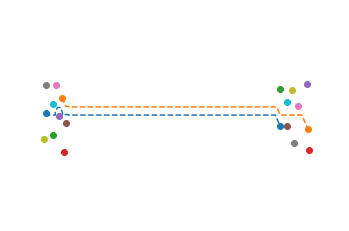

In [30]:
plot_solution(x)

In [ ]:
history[:,:,:,None]

In [ ]:
# prob: (batch_size, graph_size)
# mask: (batch_size, graph_size)
# input: (batch_size, graph_size, node_dim)

mask = torch.tensor(np.eye(3), dtype=torch.uint8)
mask[0, 2] = 1
mask[2, 1] = 1
sequences = [[0,2,1],[2,1,2]]
input = torch.tensor([[[1,2,3,4],[3,4,5,6],[5,6,7,8]],[[7,8,9,10],[9,10,11,12],[10,11,12,14]],[[11,12,13,14],[13,14,15,16],[15,16,17,18]]])

history = torch.tensor(np.array(sequences).T)
history_ = history[:,:,None].expand(*history.shape,4)

history_nodes = torch.gather(input, 1, torch.tensor(history_))


def is_valid_partial_route(history_node):
    history_node = list(map(tuple, history_node))
    indexes = list(range(len(history_node)))
    result = copt.evaluate(history_node, indexes)

    return result['success']

any(list(map(is_valid_partial_route, history_nodes.tolist())))

In [ ]:
all([1,1,0])

In [ ]:
copt.evaluate(problem, solutions[0]['order'])

In [ ]:
dir(copt)

In [ ]:
copt.bruteForce(problem, 1)

In [ ]:
# problem = problem[:2]
problem

In [ ]:
order = np.arange(len(problem))
order = order.tolist()
order

In [ ]:
eval = copt.evaluate(problem, order)
eval

In [ ]:
n = 3
test_prob = problem[:n]
test_eval = copt.evaluate(test_prob, order[:n])
pprint(test_eval)
plot_solution(test_eval)

In [ ]:
time_plt = []
for i in range(1000):
    
    problem = copt.getProblem(8)
    start_time = time.time()
    order = np.arange(len(problem))
    order = order.tolist()
    copt.evaluate(problem, order)
    time_plt.append(time.time() - start_time)
plt.plot(time_plt)

In [ ]:
x_raw = np.arange(12).reshape(3,-1).tolist()
x_torch = torch.tensor(x_raw)
x_torch.size()

In [ ]:
dataset = torch.FloatTensor(5, 10, 2).uniform_(0, 1)

In [ ]:
for x in dataset:
    print(x.size())

In [ ]:
torch.tensor(1)

In [ ]:
with open('dsa', 'wb') as file:
    pass

In [ ]:
with open('pcb_5_5k_bruteforce_data') as file:
    ans = json.load(file)

In [ ]:
os.makedirs('ddfss/fds/fds/fds')

In [ ]:
ans[0]